## Prepare files for modeling with GBIS

Post-processing after smallbaselineApp.py

In [1]:
%matplotlib inline
import os
import mintpy
from mintpy.objects import sensor
from mintpy.utils import readfile
from mintpy import save_roipac, save_gbis

## Common setting
ref_lat, ref_lon = 31.930, 130.864

### Shinmoedake - ALOS descending track 73

Go to directory /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy
save_roipac.py velocity.h5 -m maskTempCoh.h5 --ref-lalo 31.93 130.864
change reference point to y/x: [36, 50]
read None from file velocity.h5
convert velocity to displacement for 20081012_20100302
convert displacement to phase in radian
mask data based on input file: maskTempCoh.h5
write 20081012_20100302.unw
write 20081012_20100302.unw.rsc
save_gbis.py 20081012_20100302.unw -g inputs/geometryGeo.h5
number of pixels: 43379
saved figure to /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy/ShinmoedakeAlosDT73_20081012_20100302.png
save to file: /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy/ShinmoedakeAlosDT73_20081012_20100302.mat.mat
showing...


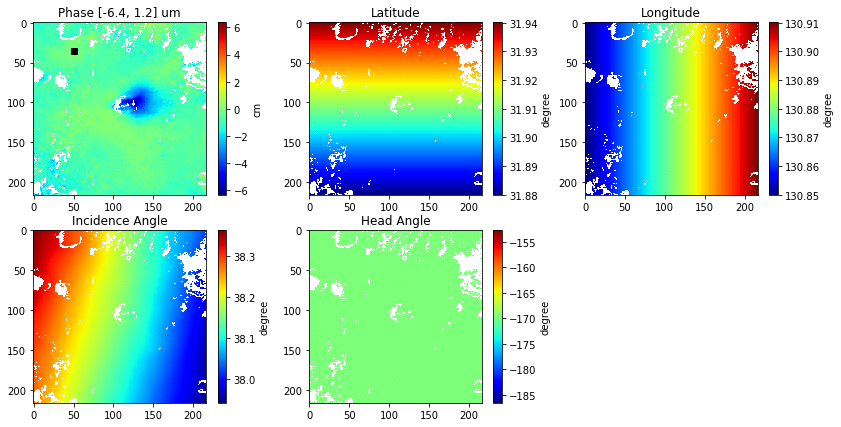

In [6]:
# Go to the mintpy directory
work_dir = os.path.expanduser('~/insarlab/Kirishima/ShinmoedakeAlosDT73/mintpy')
os.chdir(work_dir)
print('Go to directory', work_dir)

# basic info
atr = readfile.read_attribute('velocity.h5')
date12 = atr['DATE12']

# save deformation to binary file in ROIPAC format
scp_args = 'velocity.h5 -m maskTempCoh.h5 --ref-lalo {lat} {lon}'.format(lat=ref_lat, lon=ref_lon)
print('save_roipac.py', scp_args)
unw_file = save_roipac.main(scp_args.split())

# prepare mat file in GBIS format
scp_args = '{} -g inputs/geometryGeo.h5'.format(unw_file)
print('save_gbis.py', scp_args)
mat_file = save_gbis.main(scp_args.split())

### Shinmoedake - ALOS descending track 73

Go to directory /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy
save_roipac.py velocity.h5 -m maskTempCoh.h5 --ref-lalo 31.93 130.864
change reference point to y/x: [36, 50]
read None from file velocity.h5
convert velocity to displacement for 20080929_20100520
convert displacement to phase in radian
mask data based on input file: maskTempCoh.h5
write 20080929_20100520.unw
write 20080929_20100520.unw.rsc
save_gbis.py 20080929_20100520.unw -g inputs/geometryGeo.h5
number of pixels: 46345
saved figure to /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy/ShinmoedakeAlosAT424_20080929_20100520.png
save to file: /Users/yunjunz/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy/ShinmoedakeAlosAT424_20080929_20100520.mat.mat
showing...


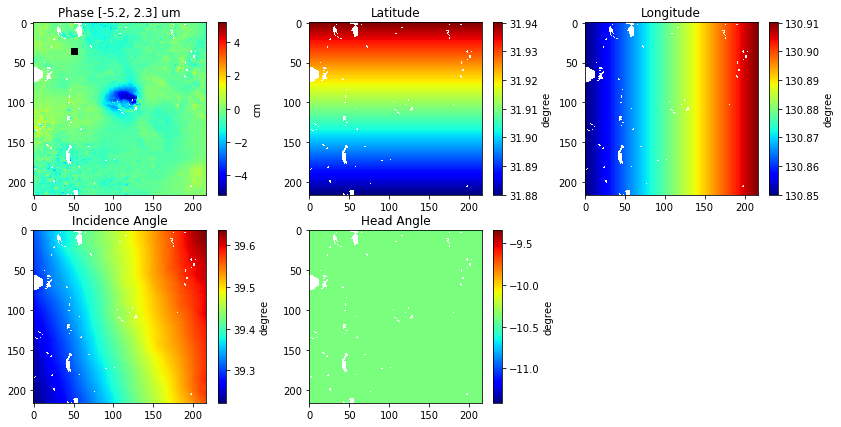

In [7]:
# Go to the mintpy directory
work_dir = os.path.expanduser('~/insarlab/Kirishima/ShinmoedakeAlosAT424/mintpy')
os.chdir(work_dir)
print('Go to directory', work_dir)

# basic info
atr = readfile.read_attribute('velocity.h5')
date12 = atr['DATE12']

# save deformation to binary file in ROIPAC format
scp_args = 'velocity.h5 -m maskTempCoh.h5 --ref-lalo {lat} {lon}'.format(lat=ref_lat, lon=ref_lon)
print('save_roipac.py', scp_args)
unw_file = save_roipac.main(scp_args.split())

# prepare mat file in GBIS format
scp_args = '{} -g inputs/geometryGeo.h5'.format(unw_file)
print('save_gbis.py', scp_args)
mat_file = save_gbis.main(scp_args.split())